<a href="https://colab.research.google.com/github/Rambe01/SupermarketSales/blob/main/SupermarketSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("supermarketsales.csv")
print(df.head())


   Invoice ID       Date   Time  Gender     Location     City Member  \
0   460489604  1/25/2018  16:46    Male   Brookfield  NewYork    Yes   
1   471006167  3/19/2018  16:48  Female  Water tower  Chicago    Yes   
2   411909258  2/25/2018  13:33    Male  Water tower  Chicago     No   
3   487313402  1/22/2018  13:38  Female    Park lane   Dallas    Yes   
4   197763430  2/18/2018  15:31  Female    Park lane   Dallas     No   

    Category  Price  Quantity  Total Payment  Rating  
0  Groceries     30         1     30    Cash       2  
1    Fashion     35         5    175    Card       3  
2   Clothing     57         2    114    Cash       5  
3   Sporting     89         4    356    Gpay       1  
4      Books     82         5    410    Cash       4  


In [3]:
conn = sqlite3.connect("sales_data.db")
df.to_sql("sales", conn, if_exists="replace", index=False)


1000

In [4]:
query = """
SELECT
    Category AS product,
    SUM(Quantity) AS total_qty,
    SUM(Quantity * Price) AS revenue
FROM sales
GROUP BY Category
"""


In [5]:
df_summary = pd.read_sql_query(query, conn)
print("\nSales Summary:")
print(df_summary)



Sales Summary:
     product  total_qty  revenue
0      Books        681    36103
1   Clothing        705    35925
2    Fashion        628    32778
3  Furniture        668    34141
4  Groceries        660    31236
5   Sporting        717    37605


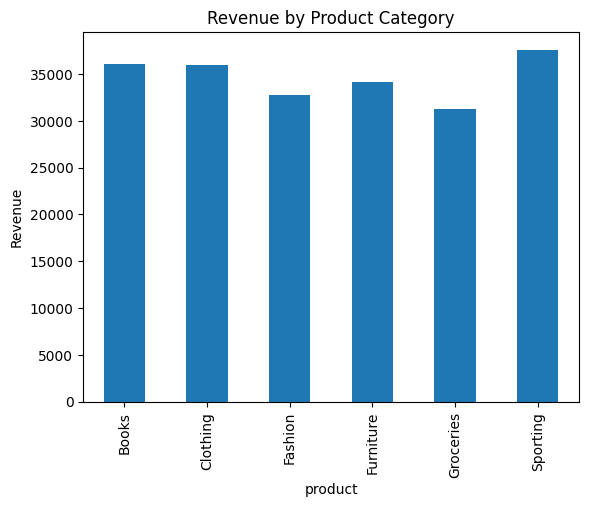

In [6]:
df_summary.plot(kind='bar', x='product', y='revenue', legend=False)
plt.ylabel("Revenue")
plt.title("Revenue by Product Category")
plt.show()